<a href="https://colab.research.google.com/github/manveethjain8/Machine-Learning/blob/main/Handwritten%20Image%20Recognition%20with%20Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [71]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [72]:
train_filter = np.isin(y_train, [0, 1])
test_filter = np.isin(y_test, [0, 1])

X_train = X_train[train_filter]
y_train = y_train[train_filter]
X_test = X_test[test_filter]
y_test = y_test[test_filter]

In [73]:
X_train = X_train.astype('float64') / 255.0
X_test = X_test.astype('float64') / 255.0

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [74]:
model = LogisticRegression(max_iter=100000)
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

LogisticRegression(max_iter=100000)

In [75]:
y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

Accuracy: 0.9995271867612293


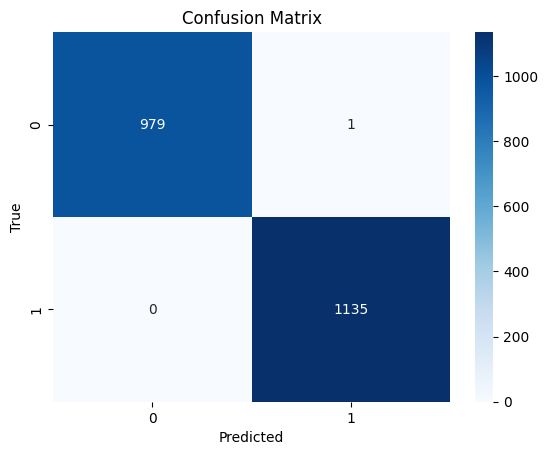

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135

    accuracy                           1.00      2115
   macro avg       1.00      1.00      1.00      2115
weighted avg       1.00      1.00      1.00      2115



In [76]:
print("Accuracy:", accuracy_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

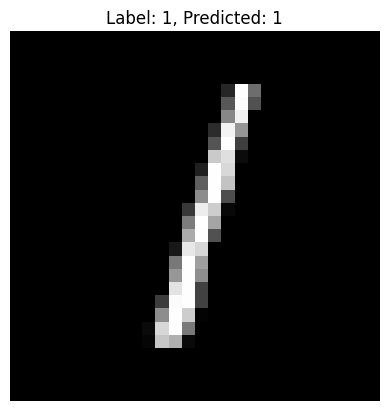

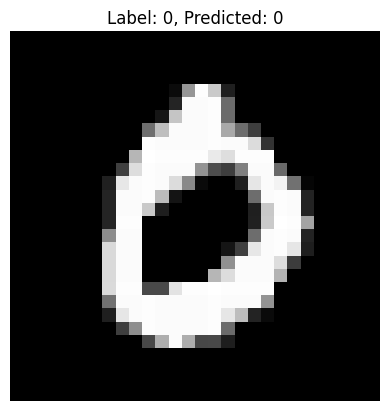

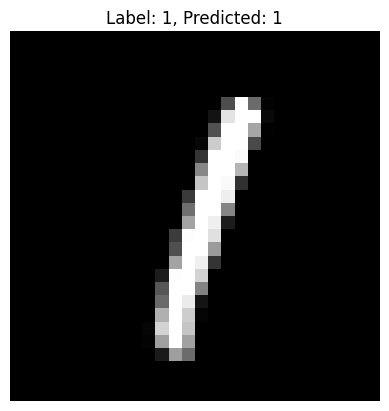

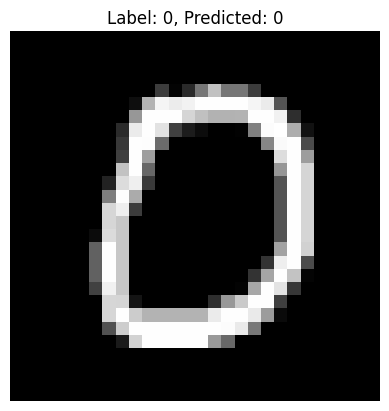

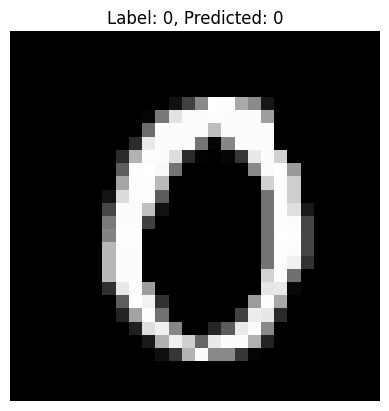

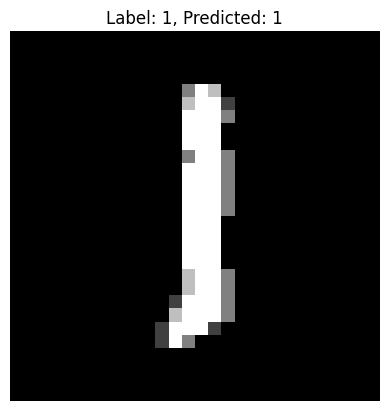

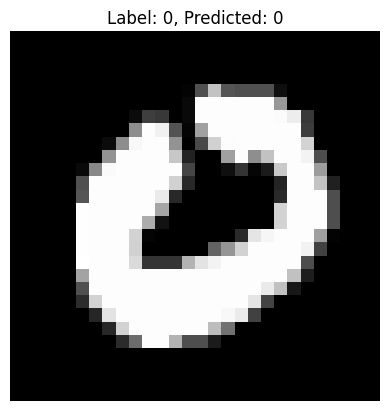

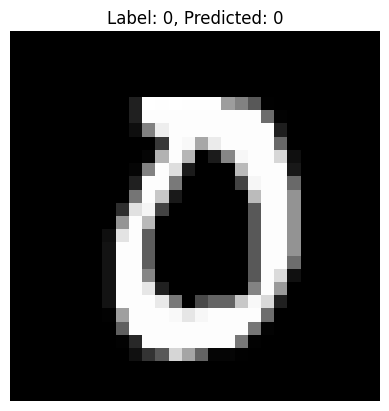

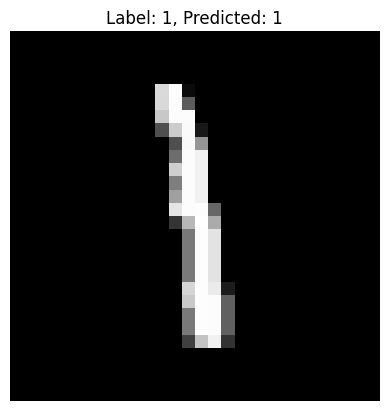

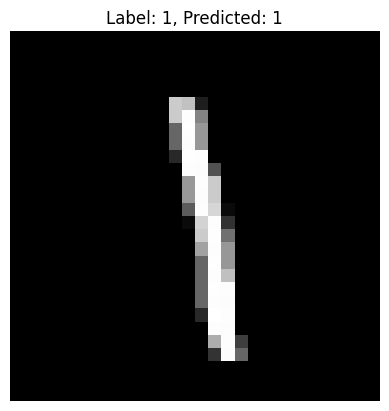

In [77]:

for i in range(10):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_test[i]}, Predicted: {y_pred[i]}")
    plt.axis('off')
    plt.show()

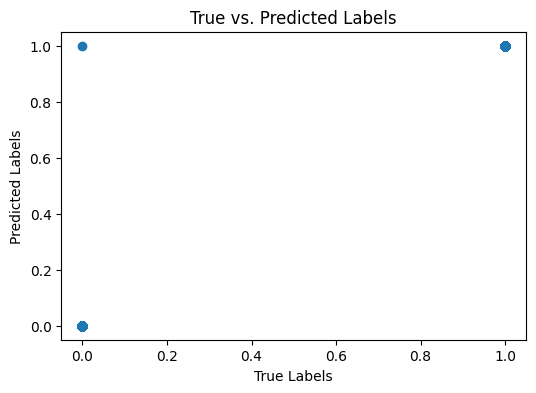

In [78]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test.reshape(y_test.shape[0], -1), y_pred.reshape(y_pred.shape[0], -1))
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.title("True vs. Predicted Labels")
plt.show()
